<a href="https://colab.research.google.com/github/Mateus-Maciel/projetos-1-/blob/main/Chess_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chess


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 6.1 MB/s 


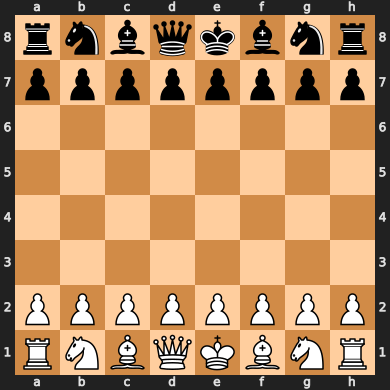

In [2]:

import chess
board = chess.Board()
board

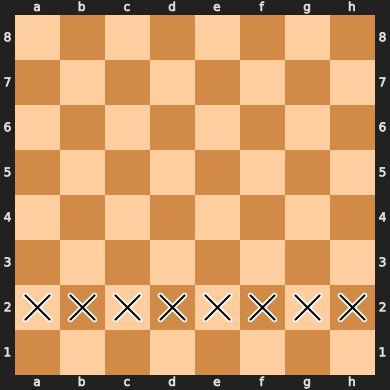

In [3]:
board.pieces(chess.PAWN, chess.WHITE)

In [4]:
len(board.pieces(chess.PAWN, chess.WHITE))
     

8

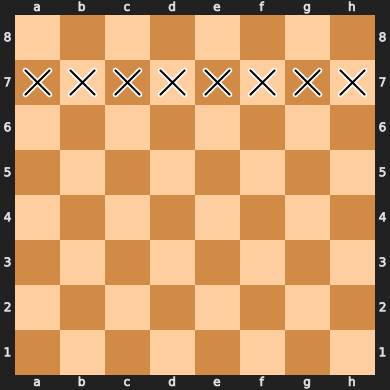

In [5]:

board.pieces(chess.PAWN, chess.BLACK)

In [6]:
for i in board.pieces(chess.PAWN, chess.WHITE):
  print(i)
     

8
9
10
11
12
13
14
15


In [7]:
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]
    
kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]
     

In [8]:
def evaluate_board():
  if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
  if board.is_stalemate():
        return 0
  if board.is_insufficient_material():
        return 0

  wp = len(board.pieces(chess.PAWN, chess.WHITE))
  bp = len(board.pieces(chess.PAWN, chess.BLACK))
  wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
  bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
  wb = len(board.pieces(chess.BISHOP, chess.WHITE))
  bb = len(board.pieces(chess.BISHOP, chess.BLACK))
  wr = len(board.pieces(chess.ROOK, chess.WHITE))
  br = len(board.pieces(chess.ROOK, chess.BLACK))
  wq = len(board.pieces(chess.QUEEN, chess.WHITE))
  bq = len(board.pieces(chess.QUEEN, chess.BLACK))

  material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)

  pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in board.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in board.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in board.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in board.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in board.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in board.pieces(chess.KING, chess.BLACK)])
  
  eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
  if board.turn:
      return eval
  else:
      return -eval


In [9]:
def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

In [10]:
def selectmove(depth):
    bestMove = chess.Move.null()
    bestValue = -99999
    alpha = -100000
    beta = 100000
    for move in board.legal_moves:
        board.push(move)
        boardValue = -alphabeta(-beta, -alpha, depth - 1)
        if boardValue > bestValue:
            bestValue = boardValue
            bestMove = move
        if boardValue > alpha:
            alpha = boardValue
        board.pop()
    return bestMove

In [11]:
def quiesce(alpha, beta):
    stand_pat = evaluate_board()
    if (stand_pat >= beta):
        return beta
    if (stand_pat > alpha):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce(-beta, -alpha)
            board.pop()
            if (score >= beta):
                return beta
            if (score > alpha):
                alpha = score
    return alpha
     


In [12]:
def devmove():
  move = selectmove(3)
  board.push(move)

In [13]:
devmove()
     

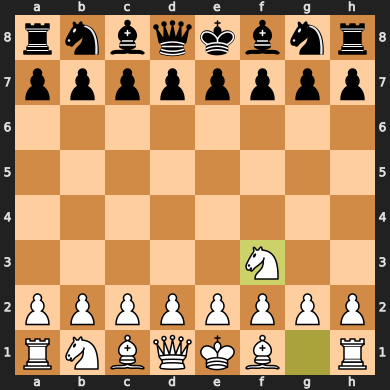

In [14]:
display(board)

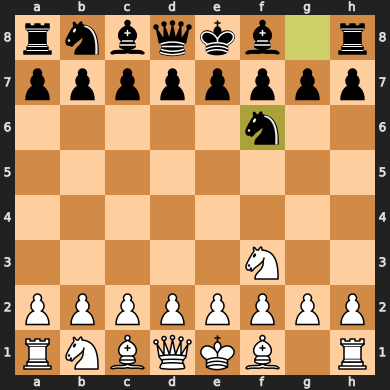

In [15]:
devmove()
board

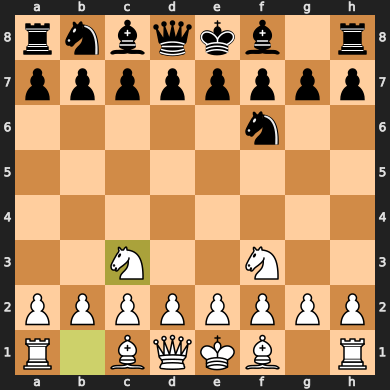

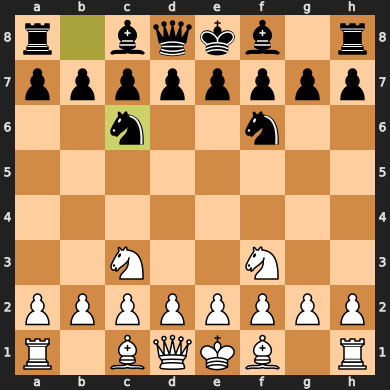

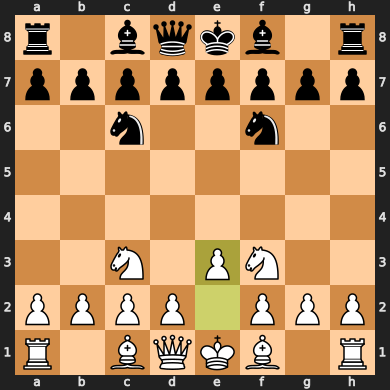

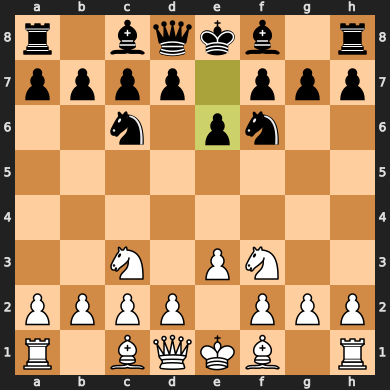

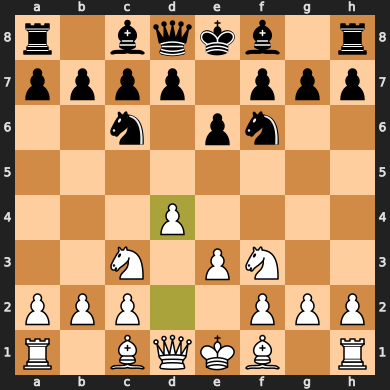

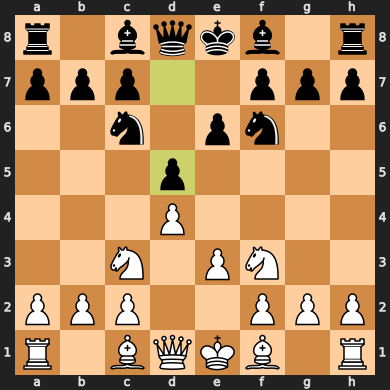

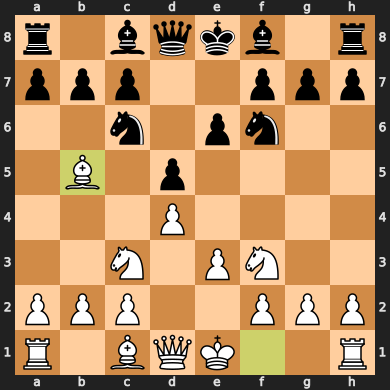

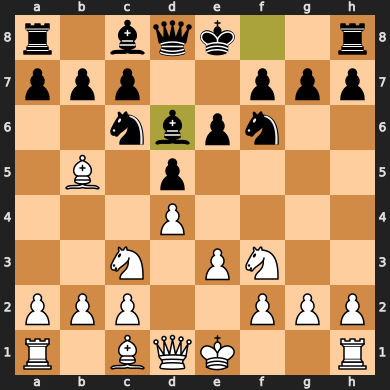

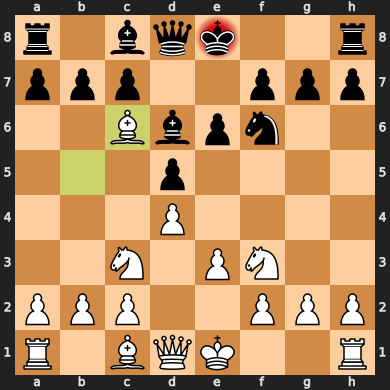

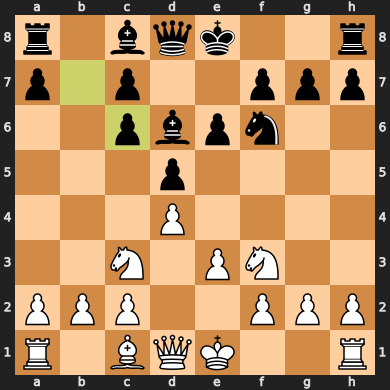

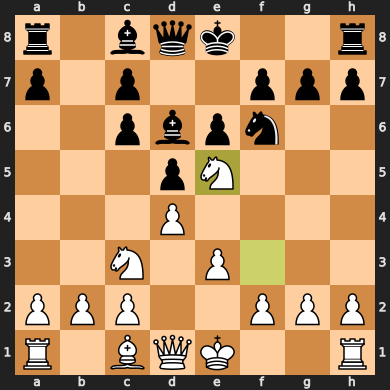

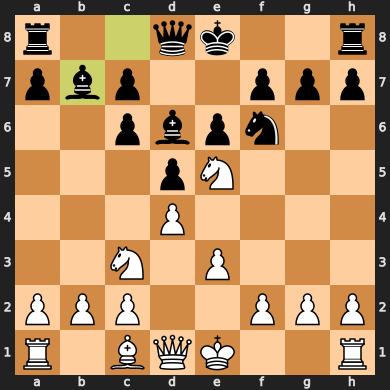

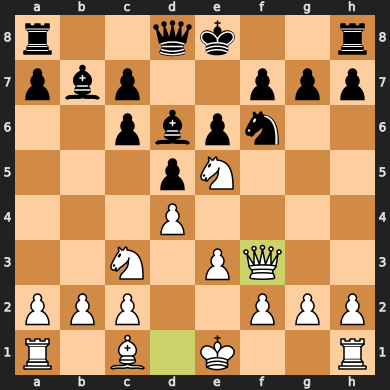

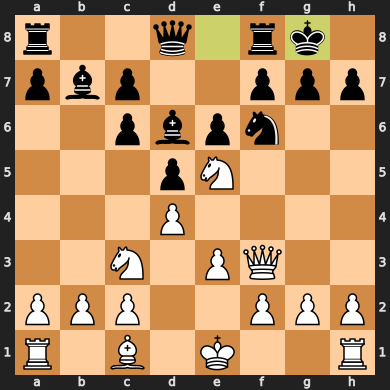

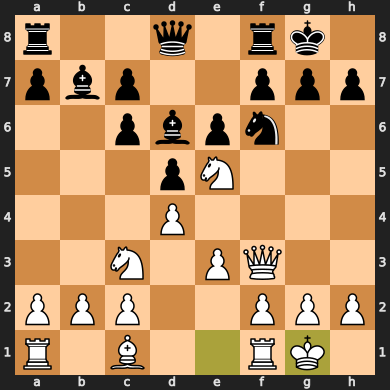

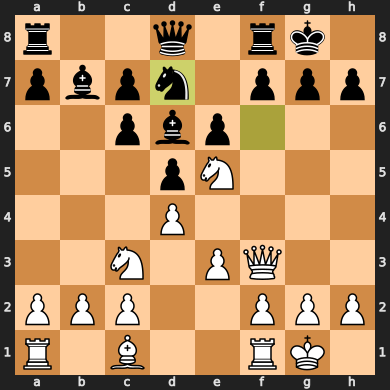

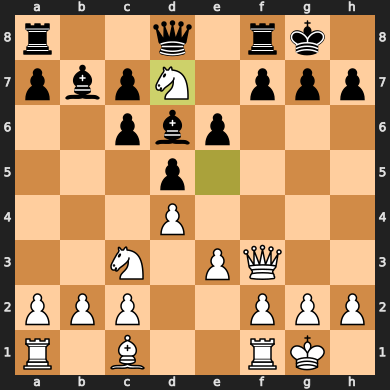

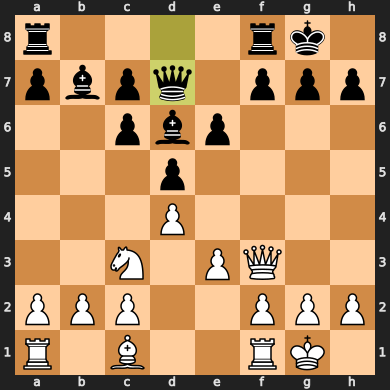

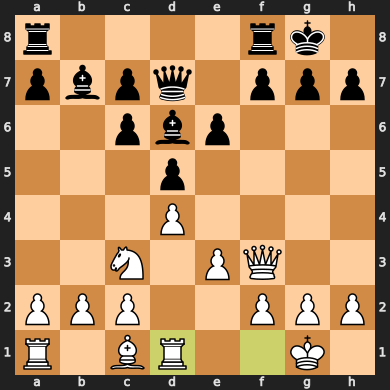

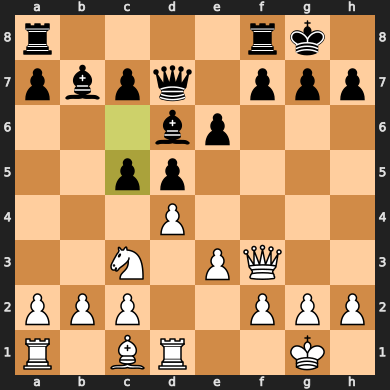

In [16]:
for i in range(20):
  devmove()
  display(board)

In [17]:
def evaluate_board(tabuleiro):
  if tabuleiro.is_checkmate():
        if tabuleiro.turn:
            return -9999
        else:
            return 9999
  if tabuleiro.is_stalemate():
        return 0
  if tabuleiro.is_insufficient_material():
        return 0

  wp = len(tabuleiro.pieces(chess.PAWN, chess.WHITE))
  bp = len(tabuleiro.pieces(chess.PAWN, chess.BLACK))
  wn = len(tabuleiro.pieces(chess.KNIGHT, chess.WHITE))
  bn = len(tabuleiro.pieces(chess.KNIGHT, chess.BLACK))
  wb = len(tabuleiro.pieces(chess.BISHOP, chess.WHITE))
  bb = len(tabuleiro.pieces(chess.BISHOP, chess.BLACK))
  wr = len(tabuleiro.pieces(chess.ROOK, chess.WHITE))
  br = len(tabuleiro.pieces(chess.ROOK, chess.BLACK))
  wq = len(tabuleiro.pieces(chess.QUEEN, chess.WHITE))
  bq = len(tabuleiro.pieces(chess.QUEEN, chess.BLACK))

  material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)

  pawnsq = sum([pawntable[i] for i in tabuleiro.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in tabuleiro.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in tabuleiro.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in tabuleiro.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in tabuleiro.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in tabuleiro.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in tabuleiro.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.KING, chess.BLACK)])
  
  eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
  if board.turn:
      return eval
  else:
      return -eval


In [18]:

def alphabeta(tabuleiro, alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(tabuleiro, alpha, beta)
    for move in tabuleiro.legal_moves:
        tabuleiro.push(move)
        score = -alphabeta(tabuleiro, -beta, -alpha, depthleft - 1)
        tabuleiro.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

In [19]:
def quiesce(tabuleiro, alpha, beta):
    stand_pat = evaluate_board(tabuleiro)
    if (stand_pat >= beta):
        return beta
    if (stand_pat > alpha):
        alpha = stand_pat

    for move in tabuleiro.legal_moves:
        if tabuleiro.is_capture(move):
            tabuleiro.push(move)
            score = -quiesce(tabuleiro, -beta, -alpha)
            tabuleiro.pop()
            if (score >= beta):
                return beta
            if (score > alpha):
                alpha = score
    return alpha
     

In [20]:
def selectmove(tabuleiro, depth):
    bestMove = chess.Move.null()
    bestValue = -99999
    alpha = -100000
    beta = 100000
    for move in tabuleiro.legal_moves:
        tabuleiro.push(move)
        boardValue = -alphabeta(tabuleiro, -beta, -alpha, depth - 1)
        if boardValue > bestValue:
            bestValue = boardValue
            bestMove = move
        if boardValue > alpha:
            alpha = boardValue
        tabuleiro.pop()
    return bestMove

In [21]:
class Chess:
  def __init__(self):
    self.tabuleiro = chess.Board()
  def move(self, k):
    for i in range(k):
      move = selectmove(self.tabuleiro, 3)
      self.tabuleiro.push(move)
      display(self.tabuleiro)
    return self

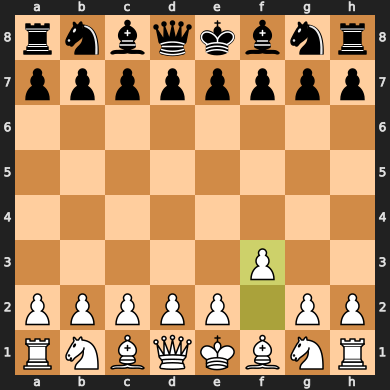

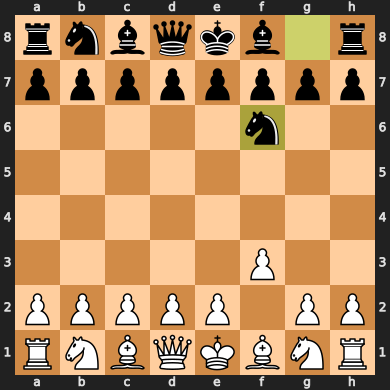

In [22]:
Chess().move(2)

In [23]:
class MaterialScore:
  def score(self, tabuleiro):
      wp = len(tabuleiro.pieces(chess.PAWN, chess.WHITE))
      bp = len(tabuleiro.pieces(chess.PAWN, chess.BLACK))
      wn = len(tabuleiro.pieces(chess.KNIGHT, chess.WHITE))
      bn = len(tabuleiro.pieces(chess.KNIGHT, chess.BLACK))
      wb = len(tabuleiro.pieces(chess.BISHOP, chess.WHITE))
      bb = len(tabuleiro.pieces(chess.BISHOP, chess.BLACK))
      wr = len(tabuleiro.pieces(chess.ROOK, chess.WHITE))
      br = len(tabuleiro.pieces(chess.ROOK, chess.BLACK))
      wq = len(tabuleiro.pieces(chess.QUEEN, chess.WHITE))
      bq = len(tabuleiro.pieces(chess.QUEEN, chess.BLACK))

      material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)
      return material


In [24]:
def evaluate_board(tabuleiro):
  if tabuleiro.is_checkmate():
        if tabuleiro.turn:
            return -9999
        else:
            return 9999
  if tabuleiro.is_stalemate():
        return 0
  if tabuleiro.is_insufficient_material():
        return 0

  material = MaterialScore().score(tabuleiro)

  pawnsq = sum([pawntable[i] for i in tabuleiro.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in tabuleiro.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in tabuleiro.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in tabuleiro.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in tabuleiro.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in tabuleiro.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in tabuleiro.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.KING, chess.BLACK)])
  
  eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
  if board.turn:
      return eval
  else:
      return -eval


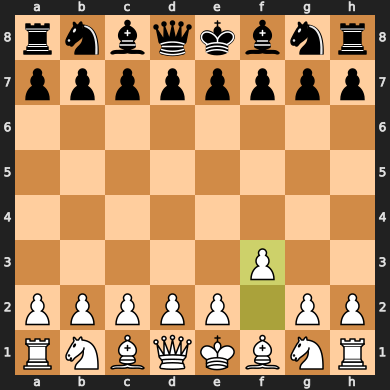

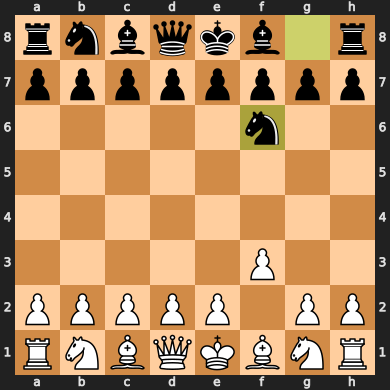

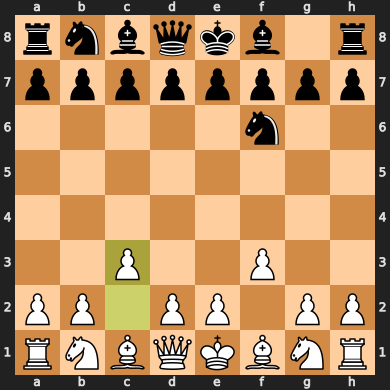

In [25]:
Chess().move(3)
     

In [26]:
class MaterialScore:
  def score(self, tabuleiro):
      wp = len(tabuleiro.pieces(chess.PAWN, chess.WHITE))
      bp = len(tabuleiro.pieces(chess.PAWN, chess.BLACK))
      wn = len(tabuleiro.pieces(chess.KNIGHT, chess.WHITE))
      bn = len(tabuleiro.pieces(chess.KNIGHT, chess.BLACK))
      wb = len(tabuleiro.pieces(chess.BISHOP, chess.WHITE))
      bb = len(tabuleiro.pieces(chess.BISHOP, chess.BLACK))
      wr = len(tabuleiro.pieces(chess.ROOK, chess.WHITE))
      br = len(tabuleiro.pieces(chess.ROOK, chess.BLACK))
      wq = len(tabuleiro.pieces(chess.QUEEN, chess.WHITE))
      bq = len(tabuleiro.pieces(chess.QUEEN, chess.BLACK))

      material = 100 * (wp + bp) + 320 * (wn + bn) + 330 * (wb + bb) + 500 * (wr + br) + 900 * (wq + bq)
      return material


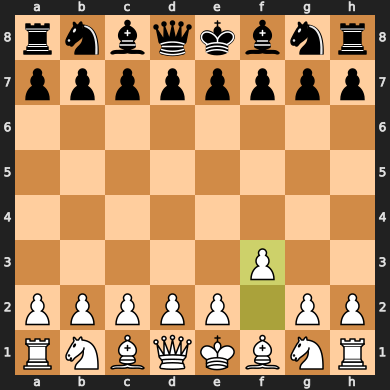

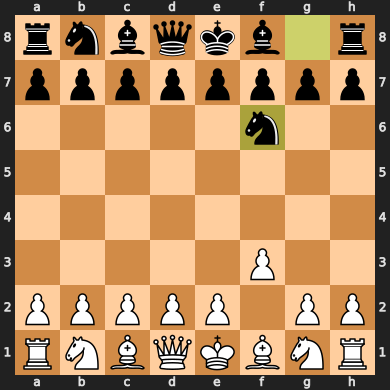

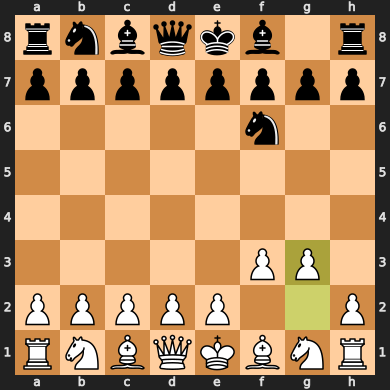

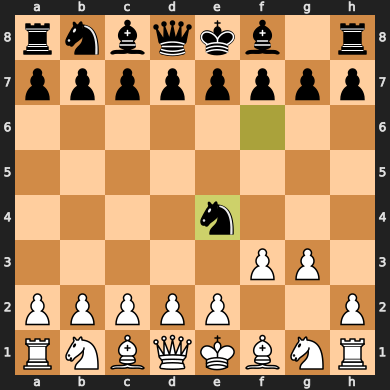

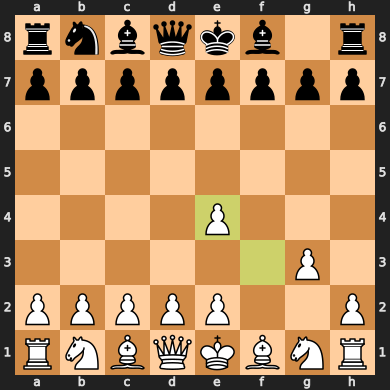

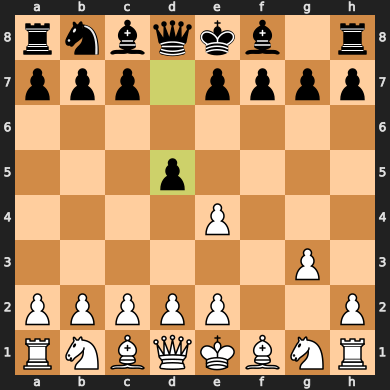

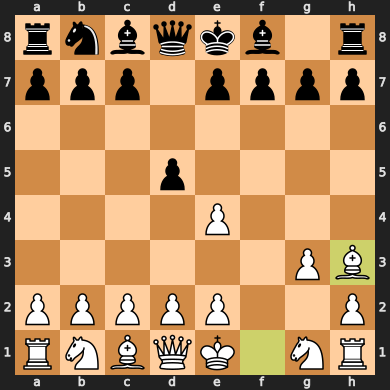

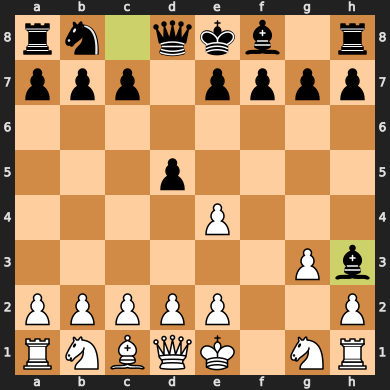

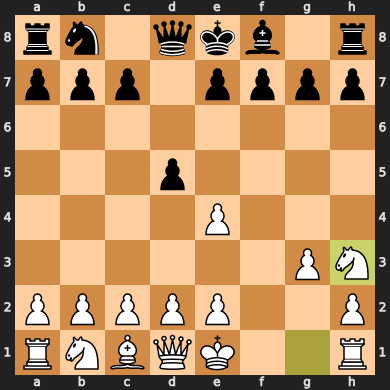

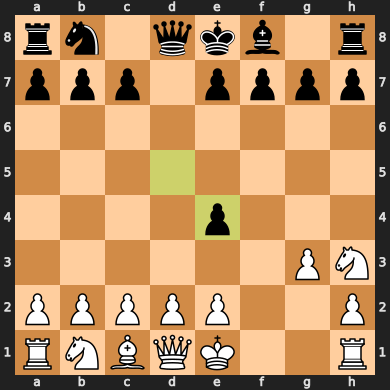

In [27]:

Chess().move(10)

In [28]:
def evaluate_board(tabuleiro):
  if tabuleiro.is_checkmate():
        if tabuleiro.turn:
            return -9999
        else:
            return 9999
  if tabuleiro.is_stalemate():
        return 0
  if tabuleiro.is_insufficient_material():
        return 0

  material = MaterialScore().score(tabuleiro)

  pawnsq = sum([pawntable[i] for i in tabuleiro.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in tabuleiro.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in tabuleiro.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in tabuleiro.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in tabuleiro.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in tabuleiro.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in tabuleiro.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.KING, chess.BLACK)])
  
  eval = pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
  if board.turn:
      return eval - material
  else:
      return -eval - material

     

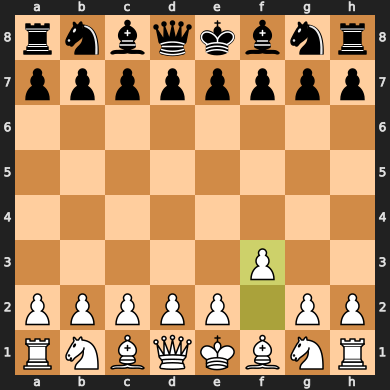

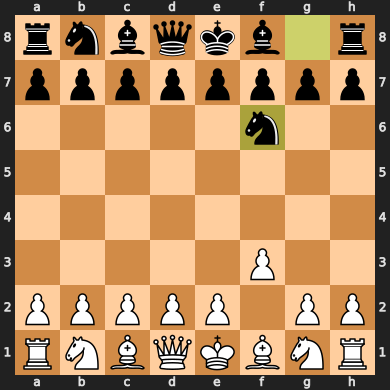

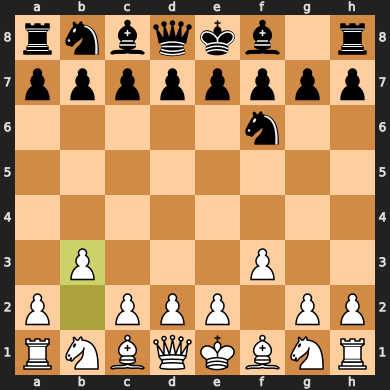

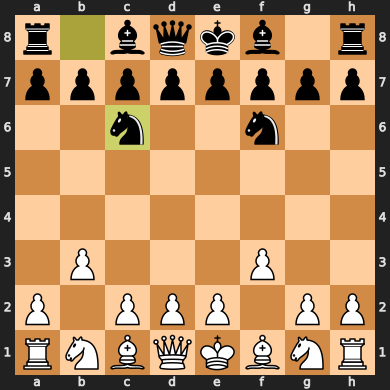

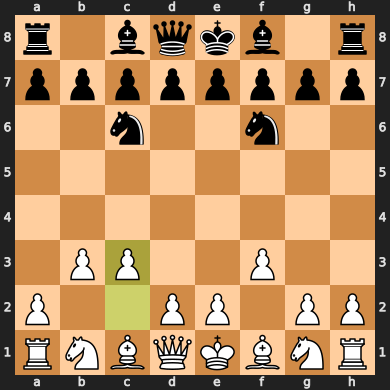

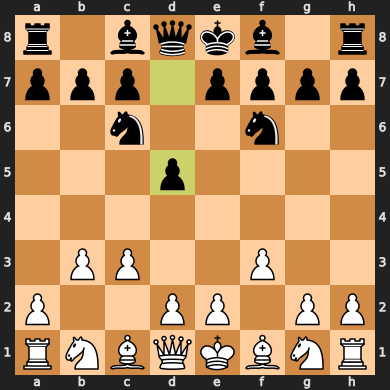

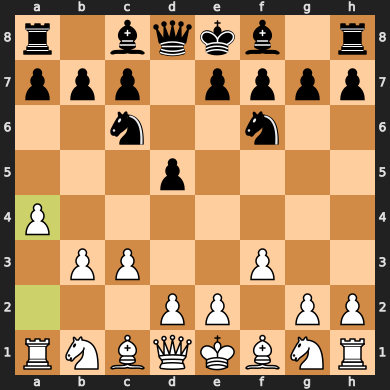

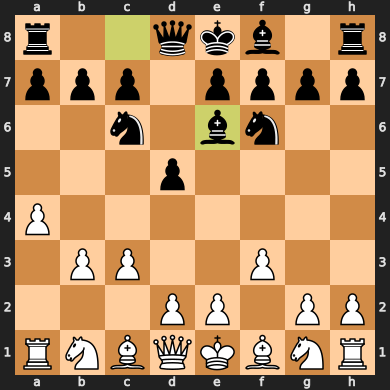

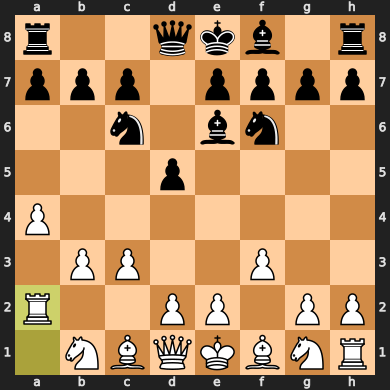

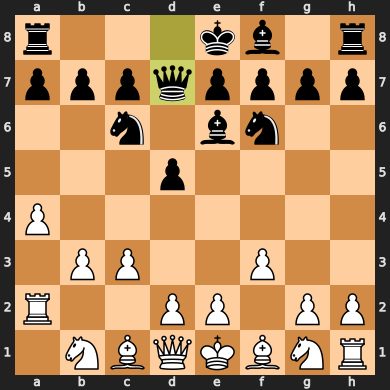

In [29]:

Chess().move(10)

In [30]:
def evaluate_board(tabuleiro):
  if tabuleiro.is_checkmate():
        if tabuleiro.turn:
            return -9999
        else:
            return 9999
  if tabuleiro.is_stalemate():
        return 0
  if tabuleiro.is_insufficient_material():
        return 0

  material = MaterialScore().score(tabuleiro)

  pawnsq = sum([pawntable[i] for i in tabuleiro.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in tabuleiro.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in tabuleiro.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in tabuleiro.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in tabuleiro.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in tabuleiro.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in tabuleiro.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.KING, chess.BLACK)])
  
  eval = -(pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq)
  if board.turn:
      return eval - material
  else:
      return -eval - material


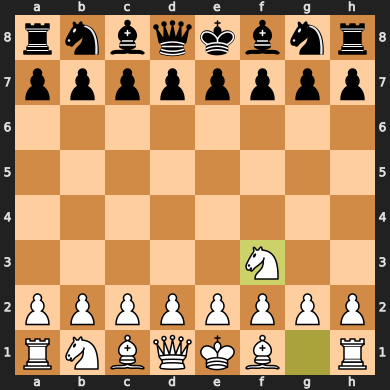

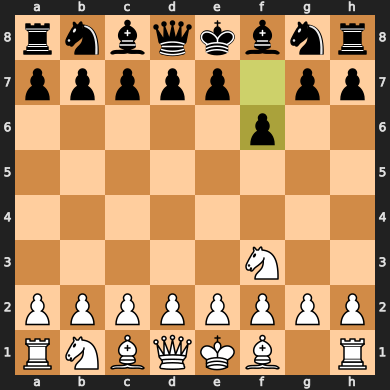

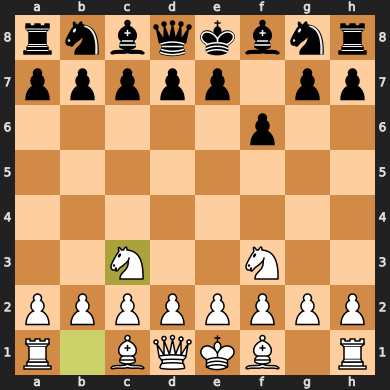

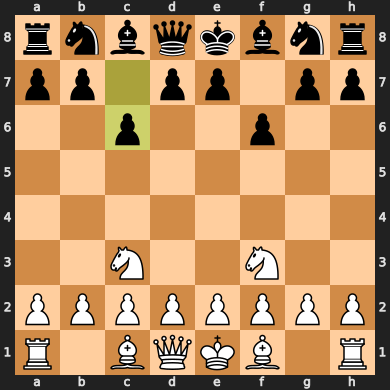

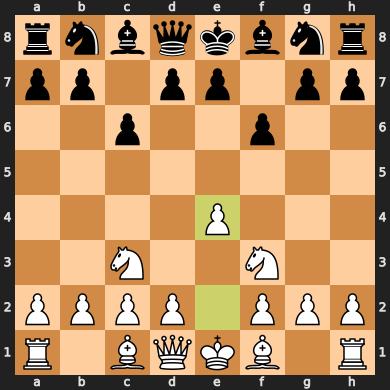

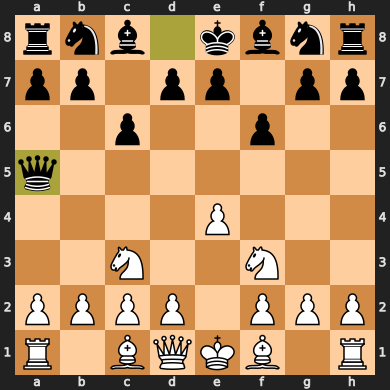

In [31]:
Chess().move(6)

In [32]:

def is_capture_moves(tabuleiro, moves):
  return [move for move in moves if tabuleiro.is_capture(move)]

In [33]:
def new_legal_moves(tabuleiro):
  legal_moves = tabuleiro.legal_moves
  captures = is_capture_moves(tabuleiro, legal_moves)
  if len(captures) > 0:
    return captures
  return legal_moves

In [34]:
def selectmove(tabuleiro, depth):
    bestMove = chess.Move.null()
    bestValue = -99999
    alpha = -100000
    beta = 100000

    for move in new_legal_moves(tabuleiro):
        tabuleiro.push(move)
        boardValue = -alphabeta(tabuleiro, -beta, -alpha, depth - 1)
        if boardValue > bestValue:
            bestValue = boardValue
            bestMove = move
        if boardValue > alpha:
            alpha = boardValue
        tabuleiro.pop()

    return bestMove
     

In [35]:
def evaluate_board(tabuleiro):
  if tabuleiro.is_checkmate():
        if tabuleiro.turn:
            return -9999
        else:
            return 9999
  if tabuleiro.is_stalemate():
        return 0
  if tabuleiro.is_insufficient_material():
        return 0

  material = MaterialScore().score(tabuleiro)

  pawnsq = sum([pawntable[i] for i in tabuleiro.pieces(chess.PAWN, chess.WHITE)])
  pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.PAWN, chess.BLACK)])
  knightsq = sum([knightstable[i] for i in tabuleiro.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.KNIGHT, chess.BLACK)])
  bishopsq = sum([bishopstable[i] for i in tabuleiro.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                            for i in tabuleiro.pieces(chess.BISHOP, chess.BLACK)])
  rooksq = sum([rookstable[i] for i in tabuleiro.pieces(chess.ROOK, chess.WHITE)])
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in tabuleiro.pieces(chess.QUEEN, chess.WHITE)])
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                          for i in tabuleiro.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in tabuleiro.pieces(chess.KING, chess.WHITE)])
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                        for i in tabuleiro.pieces(chess.KING, chess.BLACK)])
  
  eval = pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
  if board.turn:
      return eval - material
  else:
      return -eval - material


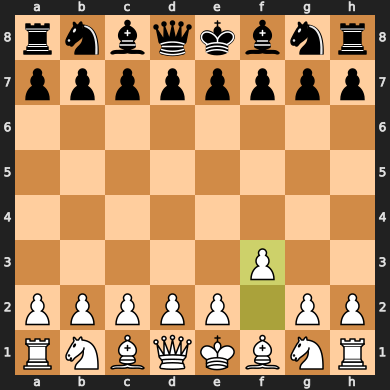

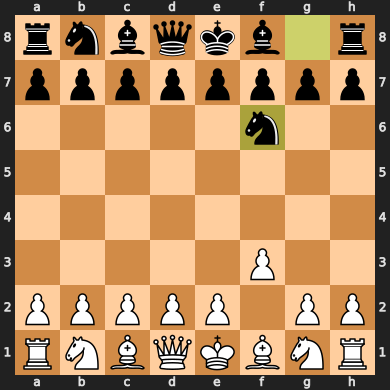

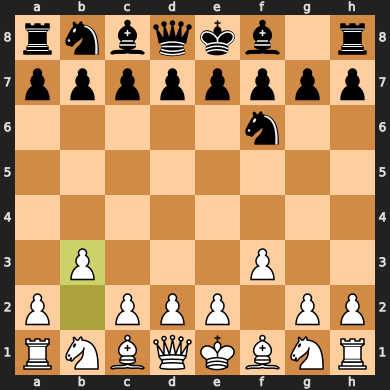

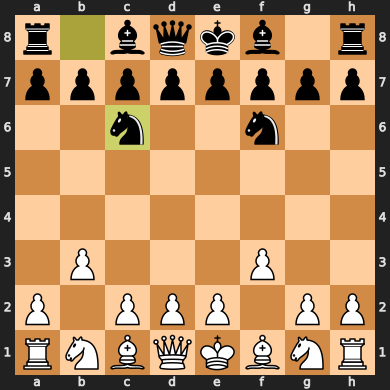

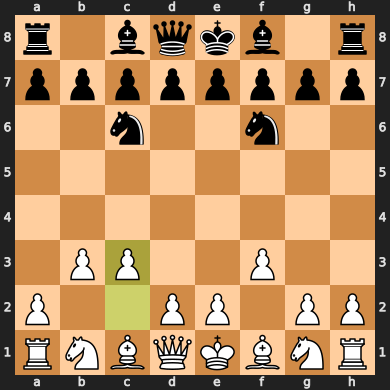

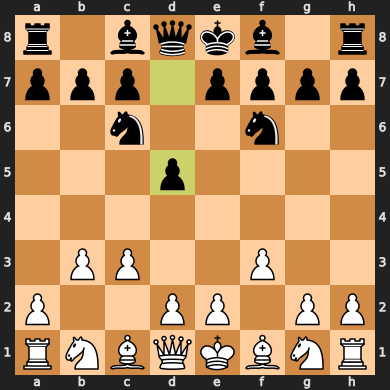

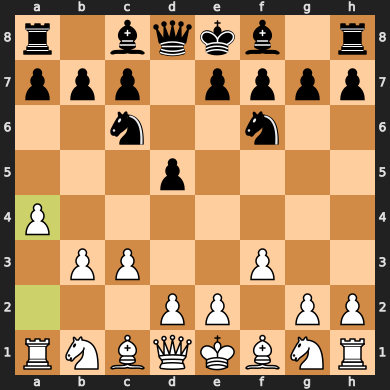

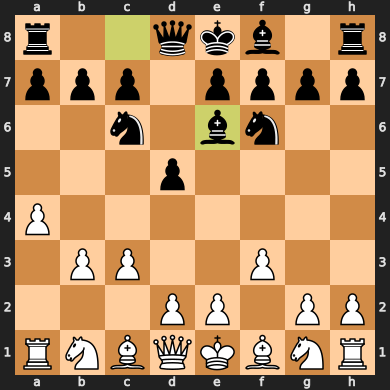

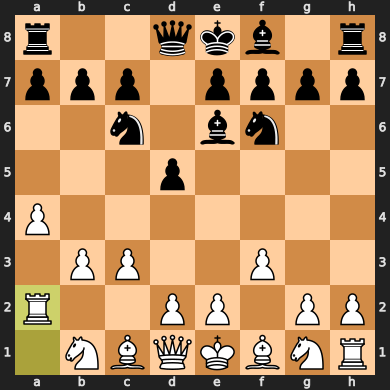

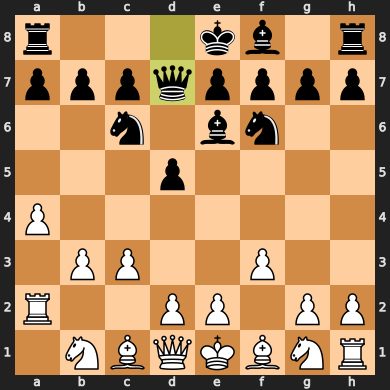

In [36]:
Chess().move(10)

In [37]:

def quiesce(tabuleiro, alpha, beta):
    stand_pat = evaluate_board(tabuleiro)
    if (stand_pat >= beta):
        return beta
    if (stand_pat > alpha):
        alpha = stand_pat

    for move in is_capture_moves(tabuleiro, tabuleiro.legal_moves):
        tabuleiro.push(move)
        score = -quiesce(tabuleiro, -beta, -alpha)
        tabuleiro.pop()
        if (score >= beta):
            return beta
        if (score > alpha):
            alpha = score
    return alpha

In [38]:
def alphabeta(tabuleiro, alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(tabuleiro, alpha, beta)

    for move in new_legal_moves(tabuleiro):
        tabuleiro.push(move)
        score = -alphabeta(tabuleiro, -beta, -alpha, depthleft - 1)
        tabuleiro.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

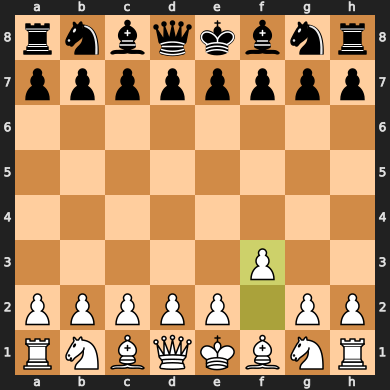

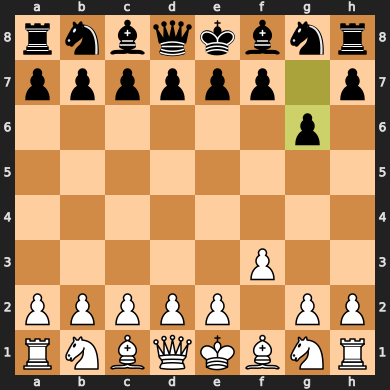

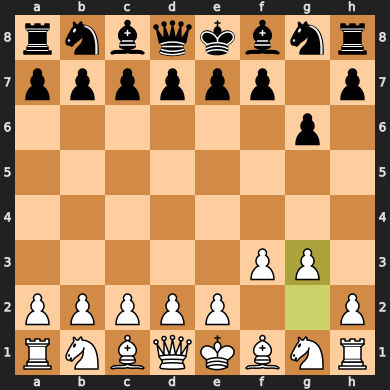

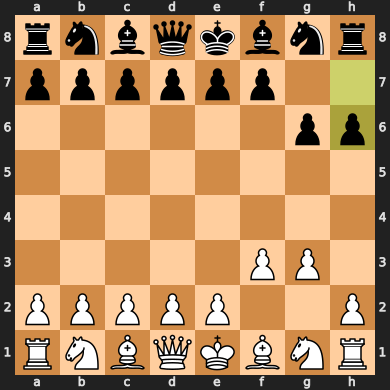

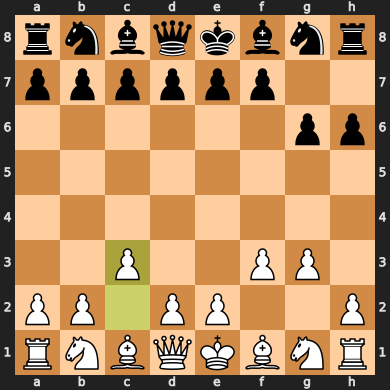

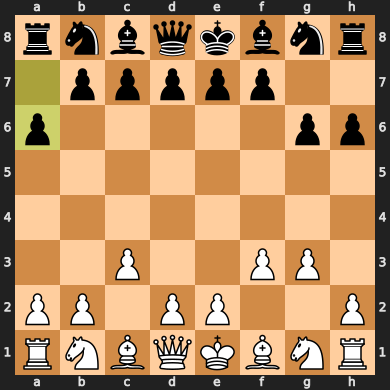

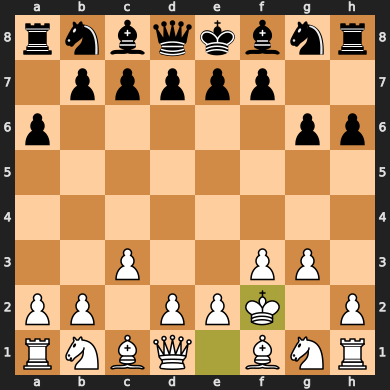

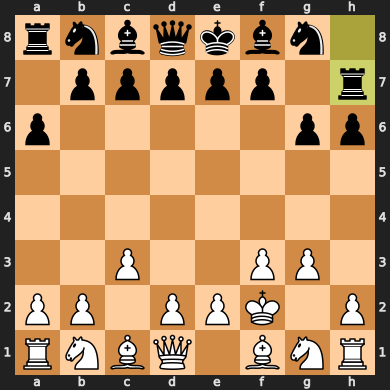

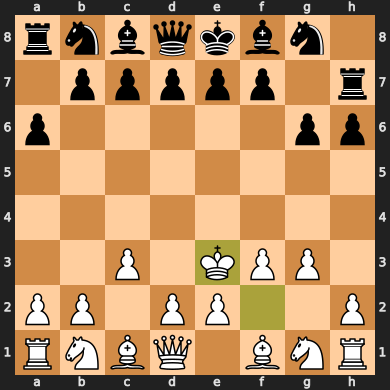

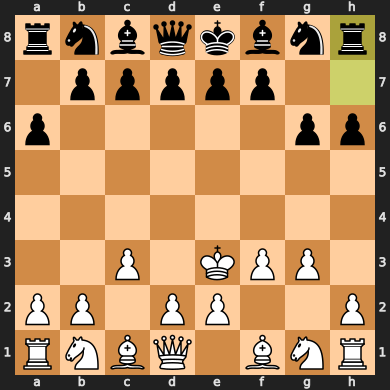

In [39]:
jogo = Chess().move(10)

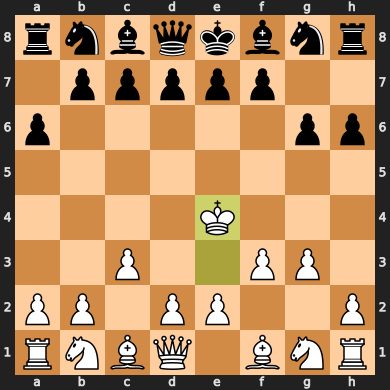

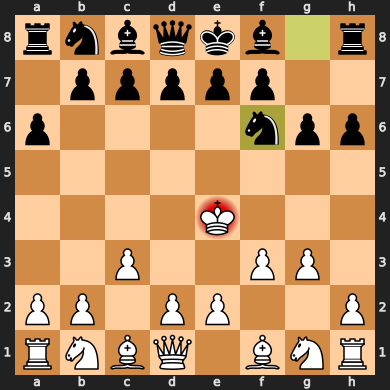

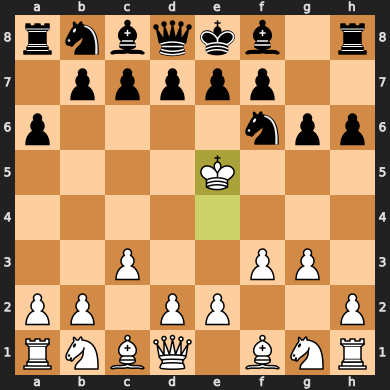

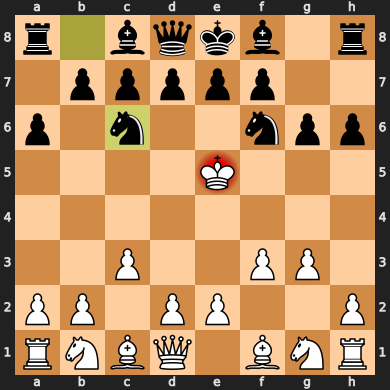

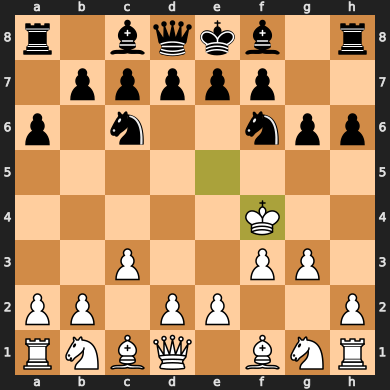

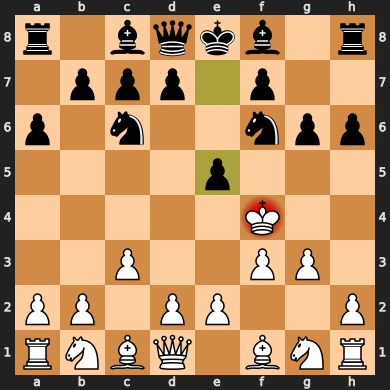

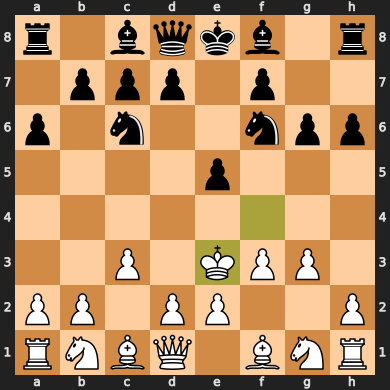

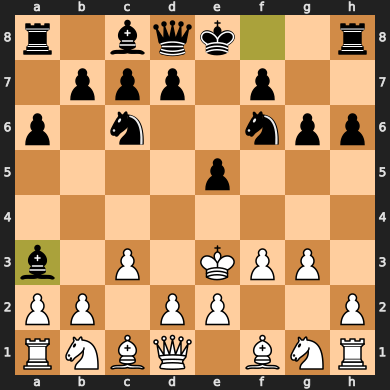

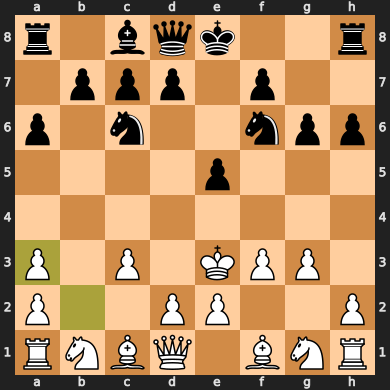

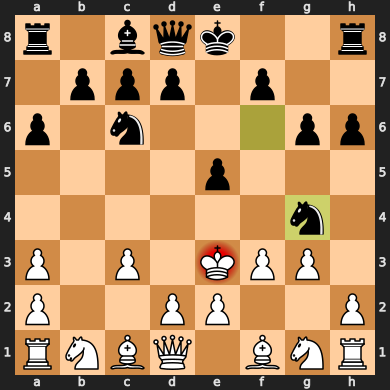

In [40]:
jogo = jogo.move(10)

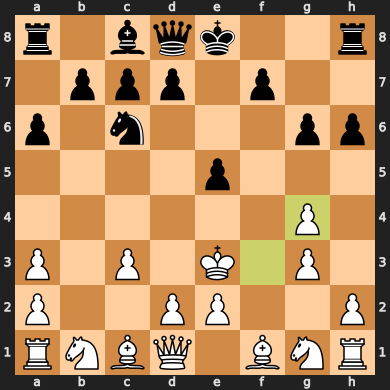

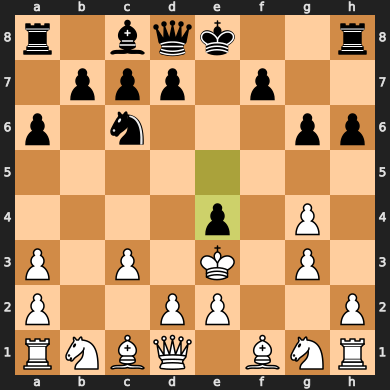

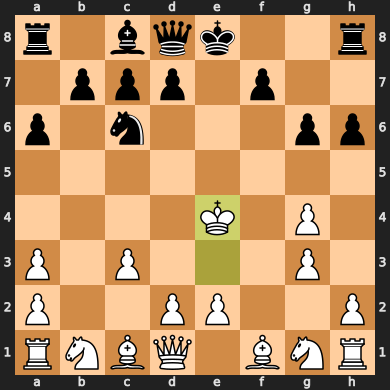

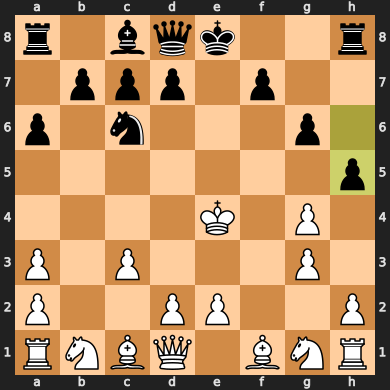

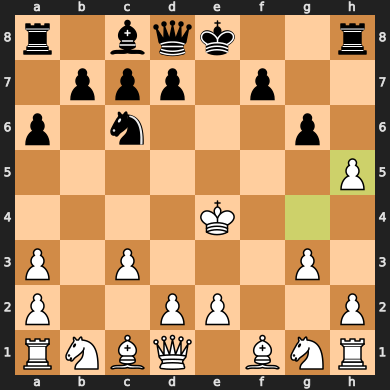

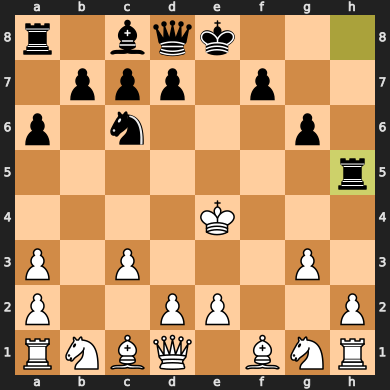

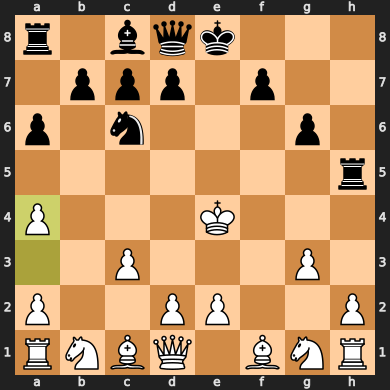

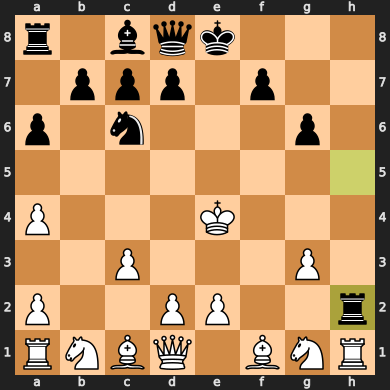

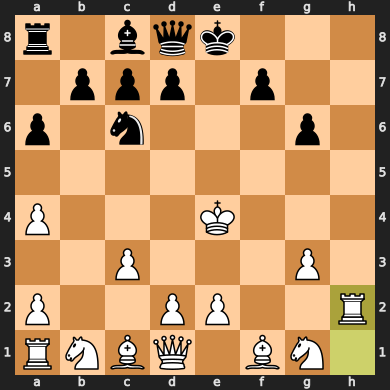

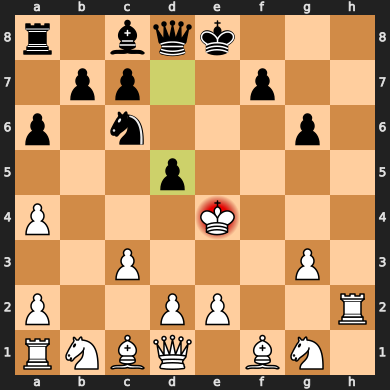

In [41]:

jogo = jogo.move(10)

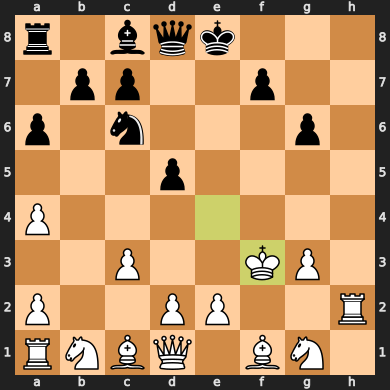

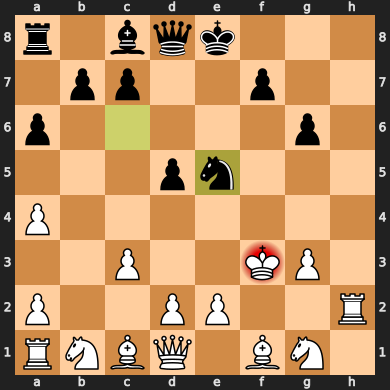

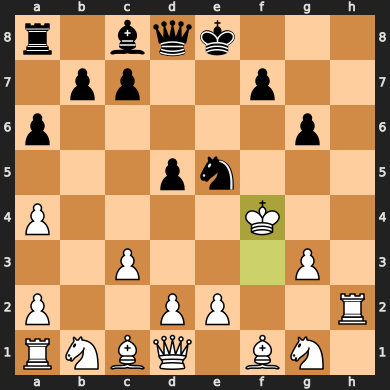

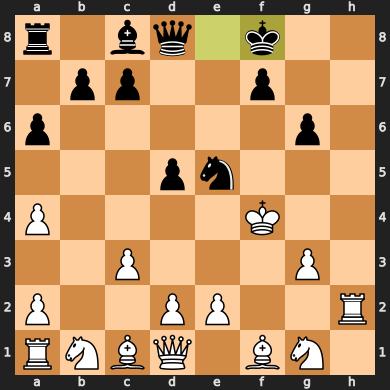

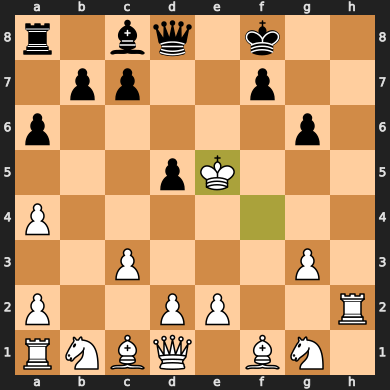

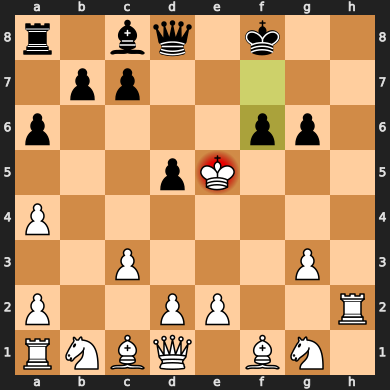

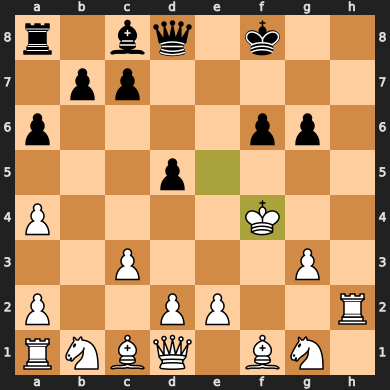

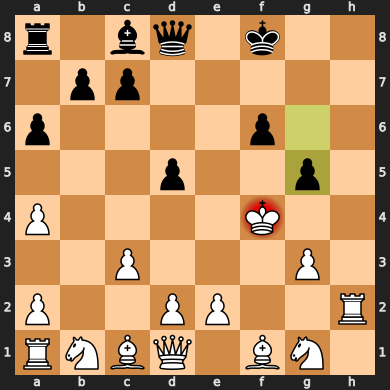

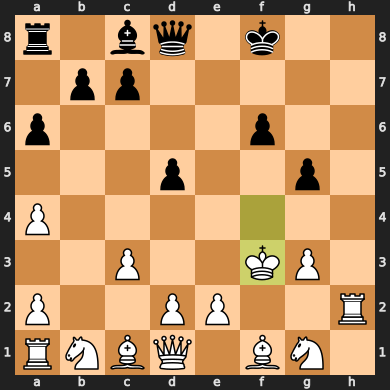

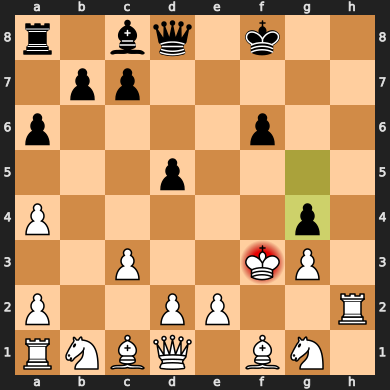

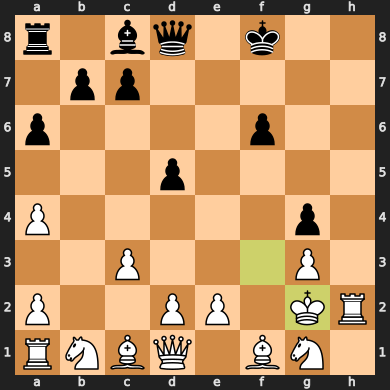

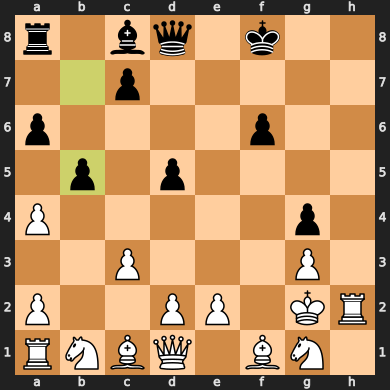

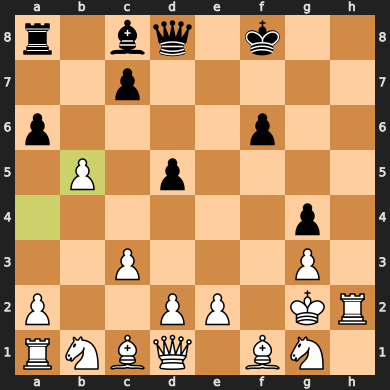

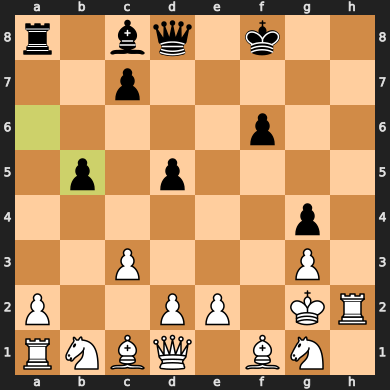

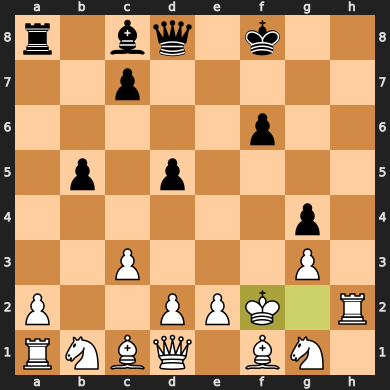

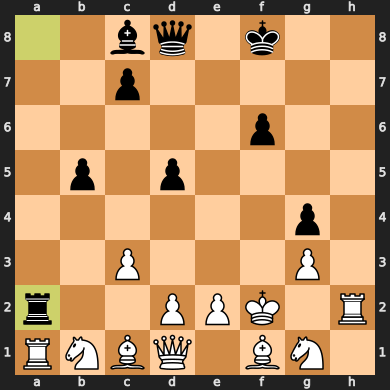

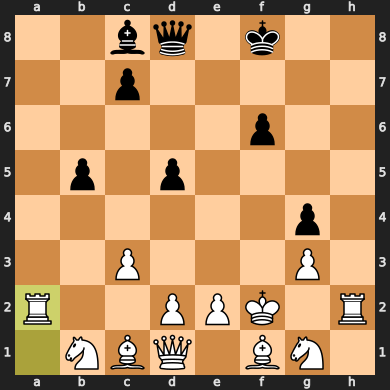

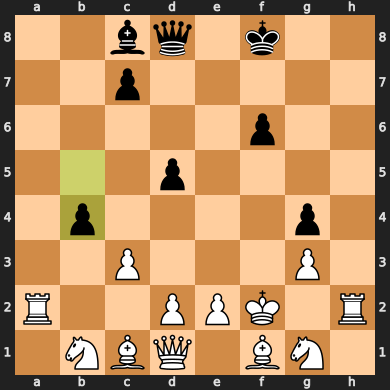

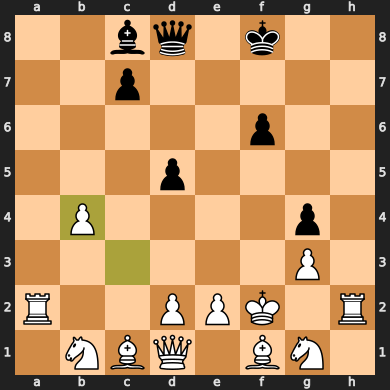

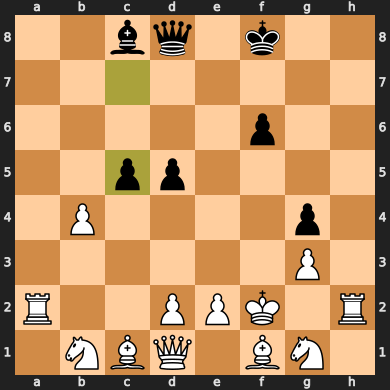

In [42]:

jogo = jogo.move(20)

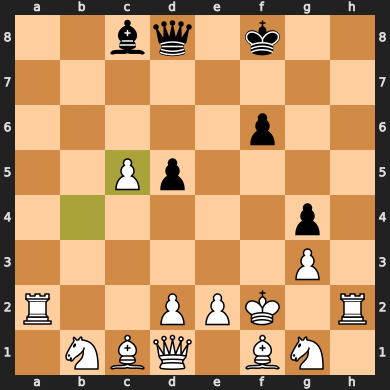

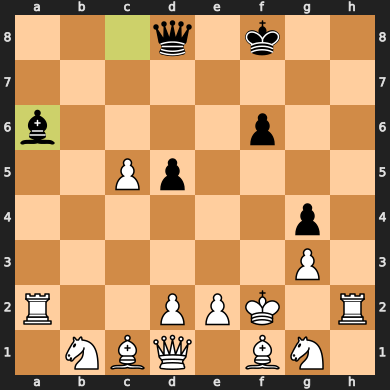

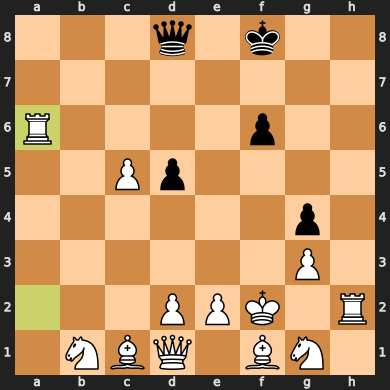

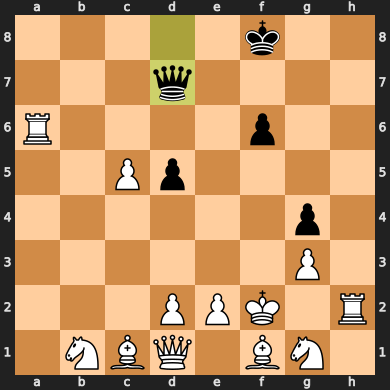

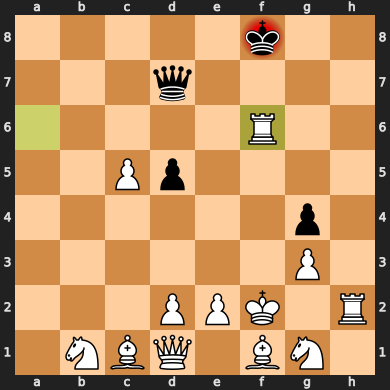

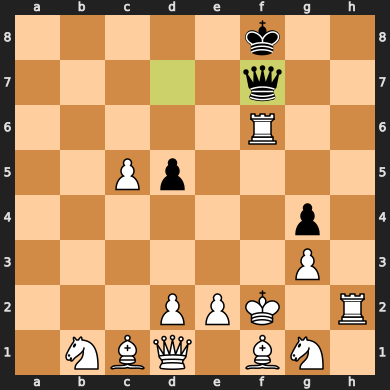

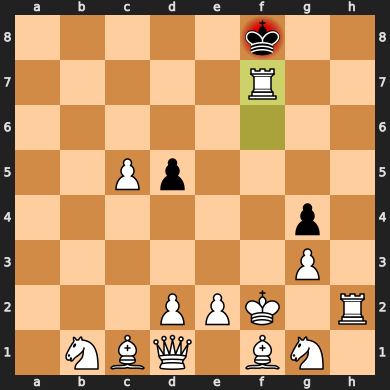

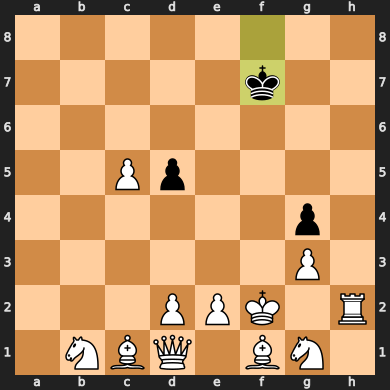

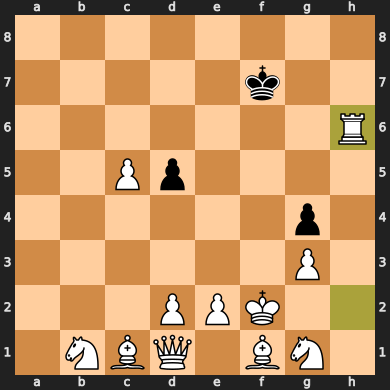

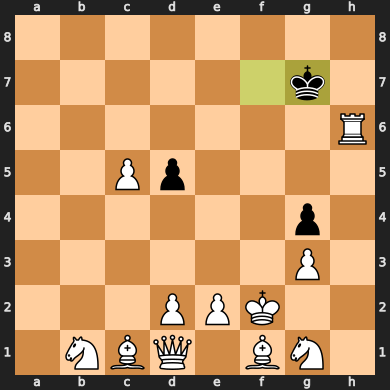

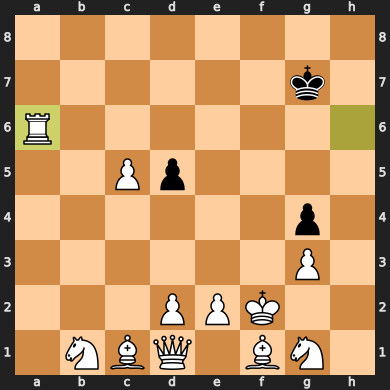

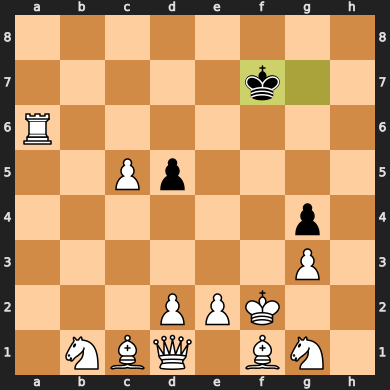

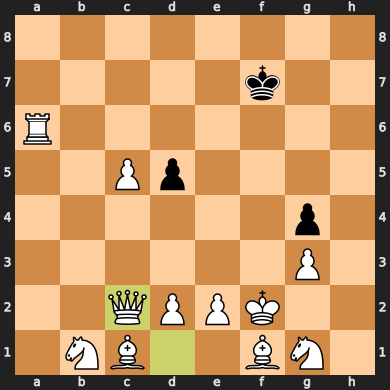

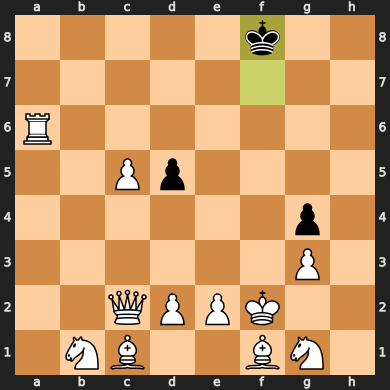

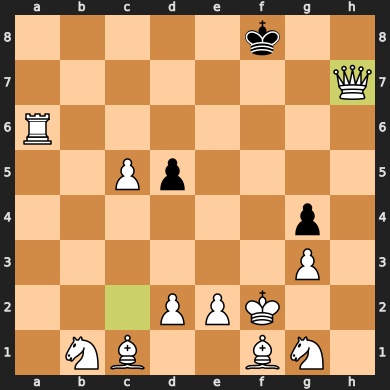

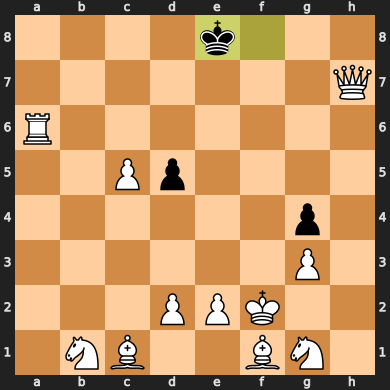

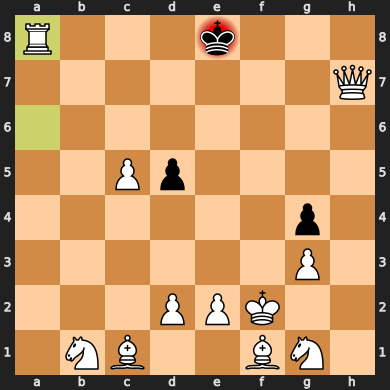

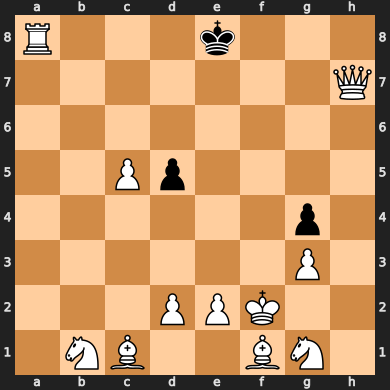

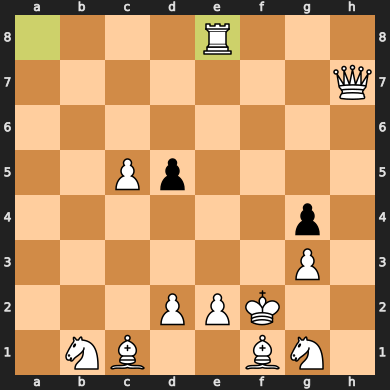

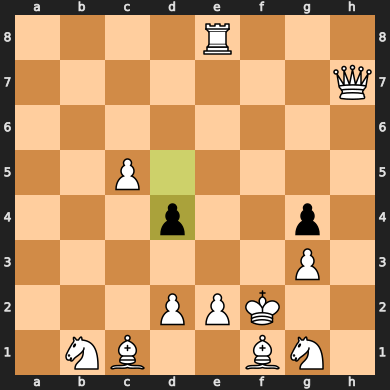

In [43]:
jogo = jogo.move(20)